<h2 align='center'> Pytorch Work Flow </h2>

<p> In this portion of the repository we will learn how ML pipelines can be built on pytorch.<br> The idea of Machine Learning / Deep Learning systems is that we use data from the past train the model to understand the patterns and predict future data. <br> The image below shows the building of AI sytems.</p>

<img src='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png'>

<p> The table below shows different steps of the process: </p>

<table>
  <tr>
    <th>Topic</th>
    <th>Contents</th>
  </tr>
  <tr>
    <td>1. Getting data ready</td>
    <td>Data can be almost anything but to get started we're going to create a simple straight line</td>
  </tr>
  <tr>
    <td>2. Building a model</td>
    <td>Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.</td>
  </tr>
  <tr>
    <td>3. Fitting the model to data (training)</td>
    <td>We've got data and a model, now let's let the model (try to) find patterns in the (training) data.</td>
  </tr>
  <tr>
    <td>4. Making predictions and evaluating a model (inference)</td>
    <td>Our model's found patterns in the data, let's compare its findings to the actual (testing) data.</td>
  </tr>
  <tr>
    <td>5. Saving and loading a model</td>
    <td>You may want to use your model elsewhere, or come back to it later, here we'll cover that.</td>
  </tr>
  <tr>
    <td>6. Putting it all together</td>
    <td>Let's take all of the above and combine it.</td>
  </tr>
</table>


<p> Most of the original content for this notebook can be found <a href='https://www.learnpytorch.io/01_pytorch_workflow/'>here</a> </p>

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

<h3>Data Preperation </h3>

Here we are synthesizing data with x ranging from 0-1 with step of 0.01. We are doing Linear Regression so <br> slope=weight_known_initial=0.45 bias_known_initial=intecept=0.33<br>
Hence <br>
Y=M*X+C [M=weight,C=bias ]


In [11]:
#Ground truth
weight_known_initial=0.45
bias_known_initial=0.33

#Data synthesis 
x=torch.arange(0,1,0.01)
y=weight_known_initial*x+bias_known_initial
print(f'X: {x.tolist()} \nY: {y.tolist()}')

X: [0.0, 0.009999999776482582, 0.019999999552965164, 0.029999999329447746, 0.03999999910593033, 0.05000000074505806, 0.05999999865889549, 0.07000000029802322, 0.07999999821186066, 0.08999999612569809, 0.10000000149011612, 0.10999999940395355, 0.11999999731779099, 0.12999999523162842, 0.14000000059604645, 0.14999999105930328, 0.1599999964237213, 0.17000000178813934, 0.17999999225139618, 0.1899999976158142, 0.20000000298023224, 0.20999999344348907, 0.2199999988079071, 0.22999998927116394, 0.23999999463558197, 0.25, 0.25999999046325684, 0.26999998092651367, 0.2800000011920929, 0.28999999165534973, 0.29999998211860657, 0.3100000023841858, 0.3199999928474426, 0.32999998331069946, 0.3400000035762787, 0.3499999940395355, 0.35999998450279236, 0.3700000047683716, 0.3799999952316284, 0.38999998569488525, 0.4000000059604645, 0.4099999964237213, 0.42000001668930054, 0.4300000071525574, 0.4399999976158142, 0.45000001788139343, 0.46000000834465027, 0.4699999988079071, 0.47999998927116394, 0.48999997

<h4>Splitting Data </h4>

<table>
  <tr>
    <th>Split</th>
    <th>Purpose</th>
    <th>Amount of total data</th>
    <th>How often is it used?</th>
  </tr>
  <tr>
    <td>Training set</td>
    <td>The model learns from this data (like the course materials you study during the semester).</td>
    <td>~60-80%</td>
    <td>Always</td>
  </tr>
  <tr>
    <td>Validation set</td>
    <td>The model gets tuned on this data (like the practice exam you take before the final exam).</td>
    <td>~10-20%</td>
    <td>Often but not always</td>
  </tr>
  <tr>
    <td>Testing set</td>
    <td>The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).</td>
    <td>~10-20%</td>
    <td>Always</td>
  </tr>
</table>

<p> Here we are going to split to train and test no validation split </p>

In [15]:
train_length=int(0.8*len(x))
x_train,y_train=x[:train_length],y[:train_length]
x_test,y_test=x[train_length:],y[train_length:]

print(f'Train X: {len(x_train)}\nTrain Y: {len(y_train)}\nTest X: {len(x_test)}\nTest Y: {len(y_test)}')

Train X: 80
Train Y: 80
Test X: 20
Test Y: 20


<h3> Dataset Visualization </h3>

Let's visualize the ideal data,test data and predicted data to identify how well our model is performing 

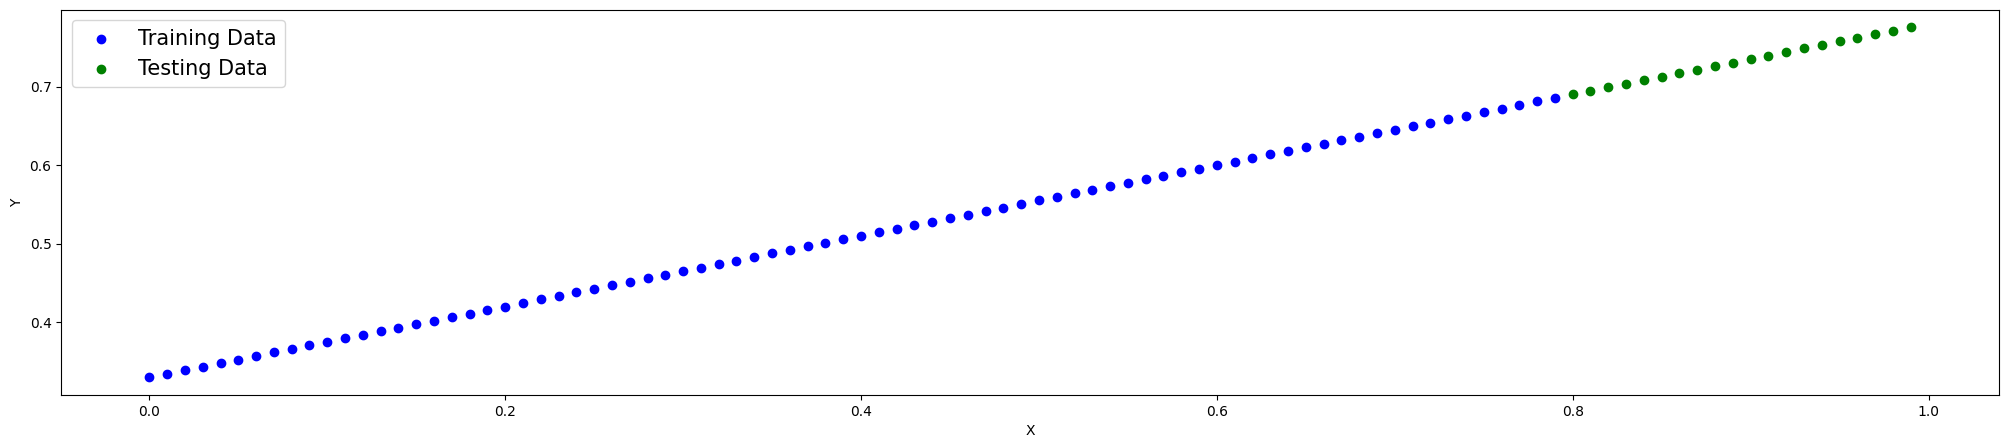

In [38]:
def plot_Linear_Regression(x_data=x_train,y_data=y_train,test_data=x_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(25,5))
    plt.scatter(x_data,y_data,c='Blue',label='Training Data')
    plt.scatter(test_data,test_labels,c='Green',label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data,test_labels,c='Red',label='Predictions')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(prop={"size": 15})

plot_Linear_Regression()


<h3> Initialiaztion Model </h3>
Let's build a model to replicate standard regression model using pure Pytorch <br>

<table>
  <tr>
    <th>PyTorch module</th>
    <th>What does it do?</th>
  </tr>
  <tr>
    <td>torch.nn</td>
    <td>Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).</td>
  </tr>
  <tr>
    <td>torch.nn.Parameter</td>
    <td>Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".</td>
  </tr>
  <tr>
    <td>torch.nn.Module</td>
    <td>The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.</td>
  </tr>
  <tr>
    <td>torch.optim</td>
    <td>Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).</td>
  </tr>
  <tr>
    <td>def forward()</td>
    <td>All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).</td>
  </tr>
</table>


In [95]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) #Create neural network parameter with random weights tensor of length 1.
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) #Same as weights for Bias
    
    def forward(self,x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights*x+self.bias # z=w*x+b formula implementation


<h3> Checking Initial Model </h3>

Initially we have a model with random weights and bias which can be observed in the cell below.
<ul>
    <li> ''' model0.parameters() ''' : gives us parameters in list </li>
    <li> ''' model0.state_dict() ''' : gives all the state (what the model contains) </li>
</ul> 

In [96]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)
model0=LinearRegressionModel()
print(list(model0.parameters()))
print(model0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


<h3> Training Model </h3>

<table>
  <tr>
    <th>Function</th>
    <th>What does it do?</th>
    <th>Where does it live in PyTorch?</th>
    <th>Common values</th>
  </tr>
  <tr>
    <td>Loss function</td>
    <td>Measures how wrong your model's predictions (e.g., y_preds) are compared to the truth labels (e.g., y_test). Lower values indicate better performance.</td>
    <td>PyTorch has plenty of built-in loss functions in torch.nn.</td>
    <td>Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).</td>
  </tr>
  <tr>
    <td>Optimizer</td>
    <td>Tells your model how to update its internal parameters to best lower the loss.</td>
    <td>You can find various optimization function implementations in torch.optim.</td>
    <td>Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).</td>
  </tr>
</table>


In [97]:
torch.manual_seed(42)

epochs=100
train_loss_values=[]
test_loss_values=[]
epochs_count=[]

# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model0.parameters(), # parameters of target model to optimize
                            lr=0.005) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))


for epoch in range(epochs):

    ########################### Training ####################### 

    # Put model in training mode (this is the default state of a model)
    model0.train()

    # 1. Forward pass on train data using forward() method inside 
    y_pred=model0(x_train)

    # 2. Calculate loss since we have y_pred of all tensor values and y_train for all ground truths for x_trains
    loss=loss_fn(y_pred,y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss Backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ########################### Testing ##############################
    model0.eval()
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred=model0(x_test)

        # 2. Calculate loss on test data
        test_loss=loss_fn(test_pred,y_test.type(torch.float))

        # See what's happening:
        if epoch%10==0:
            epochs_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}')


Epoch: 0 | MAE Train Loss: 0.245947927236557 | MAE Test Loss: 0.29583507776260376
Epoch: 10 | MAE Train Loss: 0.188146710395813 | MAE Test Loss: 0.2281588762998581
Epoch: 20 | MAE Train Loss: 0.13034550845623016 | MAE Test Loss: 0.16048268973827362
Epoch: 30 | MAE Train Loss: 0.07254429161548615 | MAE Test Loss: 0.09280648082494736
Epoch: 40 | MAE Train Loss: 0.014743084087967873 | MAE Test Loss: 0.02513027749955654
Epoch: 50 | MAE Train Loss: 0.004395900759845972 | MAE Test Loss: 0.009862741455435753
Epoch: 60 | MAE Train Loss: 0.002683012979105115 | MAE Test Loss: 0.005866962485015392
Epoch: 70 | MAE Train Loss: 0.0009775124490261078 | MAE Test Loss: 0.002225130796432495
Epoch: 80 | MAE Train Loss: 0.0028817844577133656 | MAE Test Loss: 0.004743239376693964
Epoch: 90 | MAE Train Loss: 0.0028817844577133656 | MAE Test Loss: 0.004743239376693964


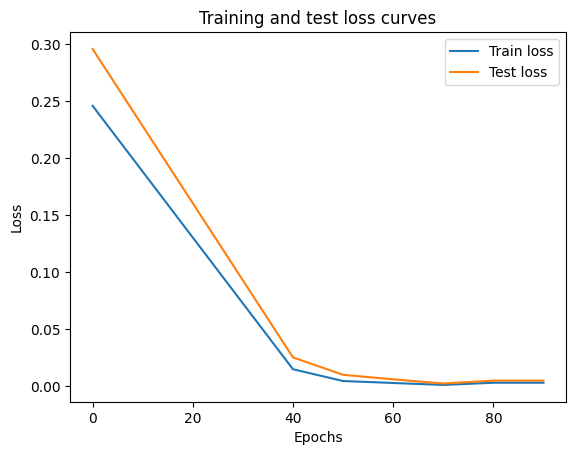

In [98]:
# Plot the loss curves
plt.plot(epochs_count, train_loss_values, label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();